# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import t
from numpy.random import seed
import scipy.stats as stats
%matplotlib inline
medical = pd.read_csv(r'Desktop\Frequentist_Statistics_Mini-Project_1AandB\data\insurance2.csv')
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [2]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Xbar = 13,270.422, S = 12,110.011; The high standard deviation suggests that the values are spread out and some lie far from the mean. Figure is right skewed. 

In [4]:
charges_mean = medical.charges.mean()
charges_std = medical.charges.std()
median_charges = medical.charges.median()
print(charges_mean, charges_std, median_charges)

13270.422265141257 12110.011236693994 9382.033


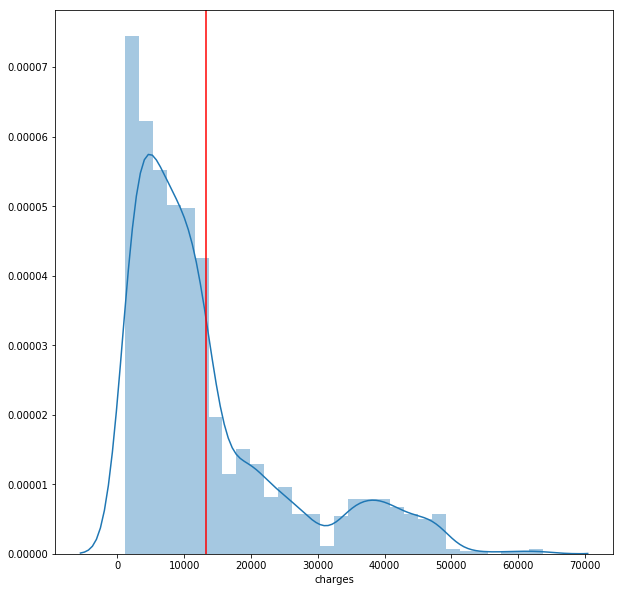

In [5]:
plt.figure(figsize = (10,10))
sns.distplot(medical['charges'], hist = True)
plt.axvline(charges_mean, color = 'red')

In [6]:
# Shapiro Wilks test shows that the parent population distribution 
# is also not normally distributed
stats.shapiro(medical.charges)

(0.814687967300415, 1.150477698013898e-36)

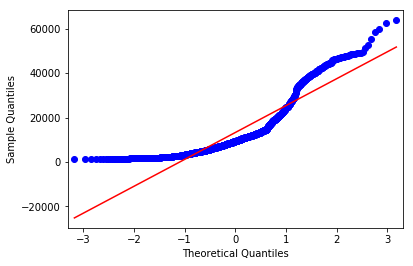

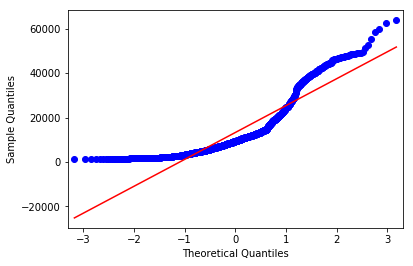

In [7]:
qqplot(medical.charges, line = 's')

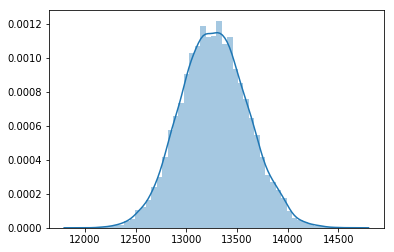

In [8]:
# brief simulation to visually see the distribution of the sample means to check work
seed(1235456)
resample = [np.random.choice(medical.charges, size = medical.charges.shape, replace = True).mean() for _ in range(10_000)]
# np.mean(resample), np.std(resample)
sns.distplot(resample)

# based on the visualization I can inspect what the outcome should be 
# the null hypothesis should fail to be rejected because the likelyhood 
# of the average mean falling below 12,000 is highly unlikely <0.15%

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed above, to apply?

__A:__   The appropriate frequentist test would be a t-test. The variable is not normally distributed from the sample or from the parent distribution but the sample size is over thirty and considered to be reasonably large enough to conduct such a test. 
The distribution suggests some implicit variable at work on the distribution as well as some outliers. This is the reason for such a high standard deviation. Because there is such a large standard deviation, the t-statistic used will be decreased and creates an opportunity to make errors with the p-value. A simulation or a non parametric test might be more appropriate instead using just one sample. Nevertheless, because their exists a large amount of observations in the data, a t-statistic can be used. 



__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__  The appropriate confidence interval would be a one sided interval because we are only concernced about the values below this threshold to test null hypothesis hospital mean charges > 12,000. Based on the confidence interval the null hypothesis has failed to be rejected. There is no justifiable concern for the hospital administrator. 2.5% likelyhood of mean under 12,000

In [9]:
# standard deviation of the sampling distribution of the sample mean \\ SE
sigma_xbar = np.sqrt(np.var(medical.charges) / len(medical.charges))

In [10]:
#critical value for t-test left tail to find less than 12,000
critical_tvalue = 1.64602

In [11]:
ci_95_lower = charges_mean - (critical_tvalue * sigma_xbar)
ci_95_upper = charges_mean + (critical_tvalue * sigma_xbar)
ci_95_lower, ci_95_upper

(12725.682293177564, 13815.162237104949)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}



__A:__  
Null Hypothesis = Patients with or without insurance are charged equally;       
mean (uninsured) == mean(insured)

Alternative Hypothesis =  Patients with insurance are charged differently than people without insurance; 
mean (uninsured) != mean(insured)
        
alpha significance level = 0.05                                                 
    random sample        --      
    Not normal; size ok  --  
    Independent --
    Variance are not equal         --

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 
Manual calculation:                                                             
t-statistic = 11.901306943555385                                               
pvalue = 4.090550214373795e-31                                                  
Scipy calculation:                                                             
t-statistic = 11.893299030876712                                                
pvalue=4.461230231620717e-31                                                                                                                                                                                                                                                

In [12]:
insurance = medical.charges.loc[medical['insuranceclaim'] == 1]
no_insurance = medical.charges.loc[medical['insuranceclaim'] == 0]

In [13]:
# insurance = 16423.928276537663;   no-insurance = 8821.421892306294
insurance_mean = insurance.mean()
no_insurance_mean = no_insurance.mean()
difference_of_means = insurance_mean - no_insurance_mean 
# difference_of_means = 7602.506384231368
difference_of_means

7602.506384231368

In [14]:
# pooled standard deviation calculations of std and n 
insurance_std = np.std(insurance)
no_insurance_std = np.std(no_insurance)
insurance_n = len(insurance)
no_insurance_n = len(no_insurance)

In [15]:
#pooled standard deviation result = 11512.282899205744
cohen_numerator = ((insurance_n - 1) * (insurance_std **2)) + ((no_insurance_n - 1) * (no_insurance_std **2))
cohen_denominator = insurance_n + no_insurance_n -2
# cohen denominator also degrees of freedom
pooled_std = np.sqrt(cohen_numerator / cohen_denominator)


In [21]:
# T-value calculated
t_value_numerator = difference_of_means - 0
SE_pool = pooled_std * (np.sqrt((1 / insurance_n) + (1 / no_insurance_n)))
t_value = t_value_numerator / SE_pool
t_value

11.901306943555385

In [22]:
degrees_of_freedom = insurance_n + no_insurance_n - 2
#degrees of freedom = 1336

In [30]:
# pvalue calculation
t.sf(t_value, degrees_of_freedom)* 2
# p-value2.0452751071868976e-31

4.090550214373795e-31

In [28]:
#  scipy testsample variance equals true
stats.ttest_ind(insurance, no_insurance)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [31]:
%whos

Variable              Type                          Data/Info
-------------------------------------------------------------
SE_pool               float64                       638.7959255473335
charges_mean          float                         13270.422265141257
charges_std           float                         12110.011236693994
ci_95_lower           float64                       12725.682293177564
ci_95_upper           float64                       13815.162237104949
cohen_denominator     int                           1336
cohen_numerator       float                         177063630488.59692
critical_tvalue       float                         1.64602
degrees_of_freedom    int                           1336
difference_of_means   float                         7602.506384231368
insurance             Series                        0       16884.92400\n1   <...>ngth: 783, dtype: float64
insurance_mean        float                         16423.928276537663
insurance_n           int   

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and that is much easier to use. All you need to do is pass it your data.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ A similar function in the scypi library includes, stats.zscore. Some mathematical preperation could be needed if two samples were evaluated. Someone can also use the norm class cdf, ppf and sf functions to deliver needed values.

## Learning outcomes

Having completed this project notebook, you have good hands-on experience of
* how you can use the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* how to then perform inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test